In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib.request
from PIL import Image
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from acquire import *
from prepare import *
from explore import *
import env

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


In [ ]:
# For this evaluation, I am choosing "dog" to be the positive/affirmitive.

# A false positive would be that the prediction was dog, but it was actually a cat.

# A false negative would be that the prediction was cat, but it was actually a dog.

#True positive is predicting its a dog, and it's a dog.
tp = 46

#True negative is predicting its a cat, and it's a cat.
tn = 34

#False positive is predicting its a dog, but it's a cat.
fp = 13

#false negative is predicting its a cat, but it's a dog.
fn = 7

print("Dog-classifier (where 'dog' is the positive prediction)")

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)

print("Accuracy is", accuracy)
print("Recall is", round(recall,2))
print("Precision is", round(precision,2))


In [ ]:
df = prep_tit(pd.DataFrame(new_tit_df()))

train, validate, test = prep_split(df, "survived")
train = train.drop(columns = ["sex", "embark_town"])
validate = validate.drop(columns = ["sex", "embark_town"])
test = test.drop(columns = ["sex", "embark_town"])

baseline = y_train.mode()

matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

num_type_list, cat_type_list = dtypes_to_list(train)
cat_analysis(train, "survived", cat_type_list)

X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

metrics = []

for i in range(2, 50):
    
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    forest = forest.fit(X_train, y_train)

    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid(True)
plt.show()


In [ ]:
df = data('iris')

df.columns = [col.lower().replace('.', '_') for col in df]

train, test = train_test_split(df, 
                               stratify=df['species'], 
                               train_size=0.8, 
                               random_state=1349)
train, validate = train_test_split(train, 
                                   stratify=train['species'], 
                                   train_size=0.7, 
                                   random_state=1349)

X_train = train.drop(columns=['species', 'petal_length', 'petal_width'])
y_train = train.species

X_validate = validate.drop(columns=['species', 'petal_length', 'petal_width'])
y_validate = validate.species

X_test = test.drop(columns=['species', 'petal_length', 'petal_width'])
y_test = test.species

sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species');

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

y_pred_proba = knn.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

model_set = []
model_accuracies = {}
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    model_set.append(clf)
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(clf.score(X_train, y_train), 2),
        'validate_score': round(clf.score(X_validate, y_validate), 2)}

model_accuracies


,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
456,456,456,0,1,65.0,0,0,26.5500,Southampton,1,1,0,1
150,150,150,0,2,51.0,0,0,12.5250,Southampton,1,1,0,1
772,772,772,0,2,57.0,0,0,10.5000,Southampton,1,0,0,1
125,125,125,1,3,12.0,1,0,11.2417,Cherbourg,0,1,0,0
688,688,688,0,3,18.0,0,0,7.7958,Southampton,1,1,0,1


Baseline is 0.62
Logistic Regression ['age', 'pclass', 'fare'] features.
Accuracy of Logistic Regression classifier on training set: 0.71

Logistic Regression ['age', 'fare', 'pclass', 'sex_male'] features.
Accuracy of Logistic Regression classifier on training set: 0.82

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       110
           1       0.65      0.63      0.64        68

    accuracy                           0.73       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



,tolerance,accuracy
0,0.0,0.383895
1,0.1,0.593633
2,0.2,0.734082
3,0.3,0.807116
4,0.4,0.810861
5,0.5,0.816479
6,0.6,0.805243
7,0.7,0.790262
8,0.8,0.762172
9,0.9,0.698502


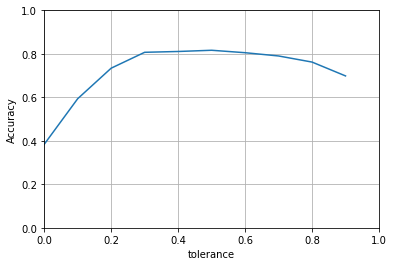

In [86]:
df = get_titanic_data()
df = prep_tit(df)
train, validate, test = prep_split(df, "survived")

impute_col_nan(train, "age", "median")
impute_col_nan(validate, "age", "median")
impute_col_nan(test, "age", "median")

display(train.head())

X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

dropcols = ['embark_town']
X_train = X_train.drop(columns=['embark_town'])
X_validate, X_test = X_validate.drop(columns=dropcols), X_test.drop(columns=dropcols)

baseline_accuracy = round((train.survived == 0).mean(), 2)

logit = LogisticRegression(random_state=1349)
selected_feats = ['age', 'pclass', 'fare']
logit.fit(X_train[selected_feats], y_train)
y_pred = logit.predict(X_train[selected_feats])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression", selected_feats, "features.")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[selected_feats], y_train)))
print()

logit1 = LogisticRegression(random_state=1349)
features = ['age', 'fare', 'pclass', 'sex_male']
logit1.fit(X_train[features], y_train)
y_pred = logit1.predict(X_train[features])

print("Logistic Regression", features, "features.")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))
print()

y_pred = logit1.predict(X_validate[features])

print(classification_report(y_validate, y_pred))

y_pred_proba = logit1.predict_proba(X_train[features])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

tolerance, model_scores = [], []

for i in np.arange(0,1,.1):
    y_pred = (y_pred_proba.survived > i).astype(int)
    accuracy = accuracy_score(y_train, y_pred)
    model_scores.append(accuracy)
    tolerance.append(i.round(1))

scores = {"tolerance":tolerance, "accuracy":model_scores}

df = pd.DataFrame(scores)
display(df)

graph = sns.lineplot(data = df, x = "tolerance", y = "accuracy")
graph.set_xlim(0, 1)
graph.set_ylim(0, 1)
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()